# general stats

In [1]:

# region wise analysis imports
import folium
from folium.plugins import MarkerCluster

# sklearn imports
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import AffinityPropagation
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.decomposition import NMF

# topic analysis imports and word cloud imports
import pandas as pd 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import gensim
import gensim.corpora as corpora
import re
import numpy as np
from pprint import pprint
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

from wordcloud import WordCloud

# sns plots

from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# network visualization

from itertools import combinations
import networkx as nx
from nxviz import CircosPlot

# imports for survey analyses

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

import datetime

import pytz

import ast

# detailed summaries

import sweetviz as sv

/home/mrinalmanu/miniconda3/envs/lda/lib/python3.10/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
pdx = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/t_gr.csv", low_memory=False)
gr_df = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/t_gr.csv", low_memory=False)
gr_df

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
0,0,100,RU,1,,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
1,1,100,RU,1,,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
2,2,100,RU,1,,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
3,3,100,RU,1,,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
4,4,4,RU,1,,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
...,...,...,...,...,...,...,...,...,...,...
82426,1912,37,ES-ES,8,,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
82427,1913,12,ES-ES,8,,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
82428,1914,19,ES-ES,8,,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
82429,1915,37,ES-ES,8,,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes


In [3]:
new_df = gr_df
new_df

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
0,0,100,RU,1,,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
1,1,100,RU,1,,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
2,2,100,RU,1,,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
3,3,100,RU,1,,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
4,4,4,RU,1,,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
...,...,...,...,...,...,...,...,...,...,...
82426,1912,37,ES-ES,8,,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
82427,1913,12,ES-ES,8,,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
82428,1914,19,ES-ES,8,,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
82429,1915,37,ES-ES,8,,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes


# groupings non composite

In [4]:
#filter all empty strings from values
gr_df["value"] = gr_df["value"].map(str)
filter = gr_df["value"] != ' '
ndf = gr_df[filter]
ndf

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
5,5,100,RU,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
10,10,100,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
28,28,100,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
45,45,25,RU,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
52,52,23,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
...,...,...,...,...,...,...,...,...,...,...
80835,321,64,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80839,325,73,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80841,327,62,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80846,332,73,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes


In [5]:
filter = gr_df["Composite"] != 'Yes'
ndf = ndf[filter]
ndf

/tmp/ipykernel_23895/429256316.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
5,5,100,RU,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
10,10,100,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
28,28,100,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
45,45,25,RU,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
52,52,23,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
...,...,...,...,...,...,...,...,...,...,...
80213,1616,100,RU,5,нет,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
80424,1827,85,RU,5,Не интересно.,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
80458,1861,100,RU,6,Нет,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
80490,1893,100,ES-ES,8,"En general, creo que se haría un mal uso de to...",LE3.108,Would you be interested in finding out about g...,Other as Text,24,No


In [6]:
#ndf['Option'] = ndf['Option'].replace("""'""", " ")

ndf.columns
ndf

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
5,5,100,RU,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
10,10,100,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
28,28,100,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
45,45,25,RU,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
52,52,23,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
...,...,...,...,...,...,...,...,...,...,...
80213,1616,100,RU,5,нет,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
80424,1827,85,RU,5,Не интересно.,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
80458,1861,100,RU,6,Нет,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
80490,1893,100,ES-ES,8,"En general, creo que se haría un mal uso de to...",LE3.108,Would you be interested in finding out about g...,Other as Text,24,No


In [7]:

cdf = ndf.groupby(["Group", "Description", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()


In [8]:
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


In [9]:
nx

,level_0,level_1,0
0,0,0,"'Other as Text','Other as Text','Other as Text..."
1,1,0,"'Future spouse or partner','Future spouse or p..."
2,2,0,"'Spouse or partner','Spouse or partner','Spous..."
3,3,0,"'Children','Children','Children','Children','C..."
4,4,0,"'Siblings','Siblings','Siblings','Siblings','S..."
5,5,0,"'Other relatives','Other relatives','Other rel..."
6,6,0,"'Friends','Friends','Friends','Friends','Frien..."
7,7,0,"'Other','Other','Other','Other','Other','Other..."
8,8,0,"'Other as Text','Other as Text','Other as Text..."
9,9,0,'Do not know who will have access to that info...


In [10]:
cdf['rating'] = nx.iloc[:,2]


In [11]:
wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 4]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

In [12]:
vc = pd.DataFrame(wo)

In [13]:
vc

,Other as Text,Future spouse or partner,Spouse or partner,Children,Siblings,Other relatives,Friends,Other,Do not know who will have access to that information,Do not know whether the data will be stored securely,I would rather not know of any potential debilitating diseases that I may develop in the future,I am not interested,I am worried that I might find out something about myself I would rather not know,I would not want to be labelled as having any deficiency,I am worried some information about my physical or mental health could be used against me for example employment; legal matters; obtaining insurance,I am concerned my data will be used for other purposes without my knowledge,Medical testing as Selfasinitiated,Medical testing as Recommended for example by doctor,Medical testing as Compulsory for example by a court or law enforcement,Paternity testing as Selfasinitiated,Paternity testing as Recommended for example by doctor,Paternity testing as Compulsory for example by a court or law enforcement,Ancestry testing as Selfasinitiated,Ancestry testing as Recommended for example by doctor,Ancestry testing as Compulsory for example by a court or law enforcement,General interest as Selfasinitiated,General interest as Recommended for example by doctor,General interest as Compulsory for example by a court or law enforcement,Health and diet as Selfasinitiated,Health and diet as Recommended for example by doctor,Health and diet as Compulsory for example by a court or law enforcement,As part of a research project as Selfasinitiated,As part of a research project as Recommended for example by doctor,As part of a research project as Compulsory for example by a court or law enforcement,Other as Selfinitiated,Other as Recommended for example by doctor,Other as Compulsory for example by a court or law enforcement
0,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,1216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,708.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']
ndfx


,Group,Description,Variable,rating,Other as Text,Future spouse or partner,Spouse or partner,Children,Siblings,Other relatives,Friends,Other,Do not know who will have access to that information,Do not know whether the data will be stored securely,I would rather not know of any potential debilitating diseases that I may develop in the future,I am not interested,I am worried that I might find out something about myself I would rather not know,I would not want to be labelled as having any deficiency,I am worried some information about my physical or mental health could be used against me for example employment; legal matters; obtaining insurance,I am concerned my data will be used for other purposes without my knowledge,Medical testing as Selfasinitiated,Medical testing as Recommended for example by doctor,Medical testing as Compulsory for example by a court or law enforcement,Paternity testing as Selfasinitiated,Paternity testing as Recommended for example by doctor,Paternity testing as Compulsory for example by a court or law enforcement,Ancestry testing as Selfasinitiated,Ancestry testing as Recommended for example by doctor,Ancestry testing as Compulsory for example by a court or law enforcement,General interest as Selfasinitiated,General interest as Recommended for example by doctor,General interest as Compulsory for example by a court or law enforcement,Health and diet as Selfasinitiated,Health and diet as Recommended for example by doctor,Health and diet as Compulsory for example by a court or law enforcement,As part of a research project as Selfasinitiated,As part of a research project as Recommended for example by doctor,As part of a research project as Compulsory for example by a court or law enforcement,Other as Selfinitiated,Other as Recommended for example by doctor,Other as Compulsory for example by a court or law enforcement
0,23,"In most instances, and assuming two parents wi...",LE3.088,"'Other as Text','Other as Text','Other as Text...",16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24,Would you be interested in finding out about g...,LE3.101,"'Future spouse or partner','Future spouse or p...",NaN,1289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24,Would you be interested in finding out about g...,LE3.102,"'Spouse or partner','Spouse or partner','Spous...",NaN,NaN,1214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,24,Would you be interested in finding out about g...,LE3.103,"'Children','Children','Children','Children','C...",NaN,NaN,NaN,1296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Would you be interested in finding out about g...,LE3.104,"'Siblings','Siblings','Siblings','Siblings','S...",NaN,NaN,NaN,NaN,1221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,24,Would you be interested in finding out about g...,LE3.105,"'Other relatives','Other relatives','Other rel...",NaN,NaN,NaN,NaN,NaN,1216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,24,Would you be interested in finding out about g...,LE3.106,"'Friends','Friends','Friends','Friends','Frien...",NaN,NaN,NaN,NaN,NaN,NaN,1199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,24,Would you be interested in finding out about g...,LE3.107,"'Other','Other','Other','Other','Other','Other...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,24,

In [15]:
hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/reg_gen_data.tsv", sep='\t', low_memory=False)
hr

del hr["Description"]
del hr["Group"]
del hr["Composite"]

In [16]:
t_gr = pd.merge(ndfx, hr, on='Variable')
del t_gr["rating"]
t_gr.columns

Index(['Group', 'Description', 'Variable', 'Other as Text',
       'Future spouse or partner', 'Spouse or partner', 'Children', 'Siblings',
       'Other relatives', 'Friends', 'Other',
       'Do not know who will have access to that information',
       'Do not know whether the data will be stored securely',
       'I would rather not know of any potential debilitating diseases that I may develop in the future',
       'I am not interested',
       'I am worried that I might find out something about myself I would rather not know',
       'I would not want to be labelled as having any deficiency',
       'I am worried some information about my physical or mental health could be used against me for example employment; legal matters; obtaining insurance',
       'I am concerned my data will be used for other purposes without my knowledge',
       'Medical testing as Selfasinitiated',
       'Medical testing as Recommended for example by doctor',
       'Medical testing as Compulsory fo

In [17]:
len(t_gr.columns) # so selection would be from columns 2 to 66 because last column is option value

41

In [18]:
t_gr

,Group,Description,Variable,Other as Text,Future spouse or partner,Spouse or partner,Children,Siblings,Other relatives,Friends,Other,Do not know who will have access to that information,Do not know whether the data will be stored securely,I would rather not know of any potential debilitating diseases that I may develop in the future,I am not interested,I am worried that I might find out something about myself I would rather not know,I would not want to be labelled as having any deficiency,I am worried some information about my physical or mental health could be used against me for example employment; legal matters; obtaining insurance,I am concerned my data will be used for other purposes without my knowledge,Medical testing as Selfasinitiated,Medical testing as Recommended for example by doctor,Medical testing as Compulsory for example by a court or law enforcement,Paternity testing as Selfasinitiated,Paternity testing as Recommended for example by doctor,Paternity testing as Compulsory for example by a court or law enforcement,Ancestry testing as Selfasinitiated,Ancestry testing as Recommended for example by doctor,Ancestry testing as Compulsory for example by a court or law enforcement,General interest as Selfasinitiated,General interest as Recommended for example by doctor,General interest as Compulsory for example by a court or law enforcement,Health and diet as Selfasinitiated,Health and diet as Recommended for example by doctor,Health and diet as Compulsory for example by a court or law enforcement,As part of a research project as Selfasinitiated,As part of a research project as Recommended for example by doctor,As part of a research project as Compulsory for example by a court or law enforcement,Other as Selfinitiated,Other as Recommended for example by doctor,Other as Compulsory for example by a court or law enforcement,Option
0,23,"In most instances, and assuming two parents wi...",LE3.088,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other as Text
1,24,Would you be interested in finding out about g...,LE3.101,NaN,1289.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Future spouse or partner
2,24,Would you be interested in finding out about g...,LE3.102,NaN,NaN,1214.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spouse or partner
3,24,Would you be interested in finding out about g...,LE3.103,NaN,NaN,NaN,1296.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Children
4,24,Would you be interested in finding out about g...,LE3.104,NaN,NaN,NaN,NaN,1221.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Siblings
5,24,Would you be interested in finding out about g...,LE3.105,NaN,NaN,NaN,NaN,NaN,1216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other relatives
6,24,Would you be interested in finding out about g...,LE3.106,NaN,NaN,NaN,NaN,NaN,NaN,1199.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Friends
7,24,Would you be interested in finding out about g...,LE3.107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other
8,24,Would you be interested in finding out about g...,LE3.108,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other as Text
9,27,What concerns do participants have in relation...,LE2.122,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [19]:
del t_gr["Variable"]
del t_gr["Option"]

lex = t_gr.set_index(['Group','Description']).stack().reset_index()
# rename columns 2 and 3
lex["Option"] = lex['level_2']
lex["Count"] = lex[0]

del lex['level_2']
del lex[0]

In [20]:
lex

,Group,Description,Option,Count
0,23,"In most instances, and assuming two parents wi...",Other as Text,16.0
1,24,Would you be interested in finding out about g...,Future spouse or partner,1289.0
2,24,Would you be interested in finding out about g...,Spouse or partner,1214.0
3,24,Would you be interested in finding out about g...,Children,1296.0
4,24,Would you be interested in finding out about g...,Siblings,1221.0
5,24,Would you be interested in finding out about g...,Other relatives,1216.0
6,24,Would you be interested in finding out about g...,Friends,1199.0
7,24,Would you be interested in finding out about g...,Other,323.0
8,24,Would you be interested in finding out about g...,Other as Text,36.0
9,27,What concerns do participants have in relation...,Do not know who will have access to that infor...,708.0


In [21]:
x = lex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()
xf['Description'].unique()

array(['In most instances, and assuming two parents will be involved in raising a child, who should decide on sequencing a child’s genome at birth?',
       'Would you be interested in finding out about genetic information',
       'What concerns do participants have in relation to genetic testing',
       'Have you ever had genetic testing and why?'], dtype=object)

In [22]:
import plotly.express as px

fig = px.bar(xf, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()

# grouping composite

## loading dataset

In [23]:
#filter all empty strings from values
gr_df["value"] = gr_df["value"].map(str)
filter = gr_df["value"] != ' '
ndf = gr_df[filter]
ndf

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
5,5,100,RU,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
10,10,100,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
28,28,100,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
45,45,25,RU,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
52,52,23,ES-ES,1,1,LE2.003,Have you ever had genetic testing and why?,Medical testing as Selfasinitiated,29,No
...,...,...,...,...,...,...,...,...,...,...
80835,321,64,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80839,325,73,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80841,327,62,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80846,332,73,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes


In [24]:
filter = gr_df["Composite"] != 'No'
ndf = ndf[filter]
ndf

/tmp/ipykernel_23895/3001485643.py:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
61344,0,100,RU,1,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61345,1,100,RU,1,6,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61347,3,100,RU,1,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61349,5,100,RU,1,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61350,6,100,ES-ES,1,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
...,...,...,...,...,...,...,...,...,...,...
80835,321,64,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80839,325,73,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80841,327,62,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80846,332,73,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes


## item 23

In [25]:
ndf['Group'].unique()

array([23, 25])

In [26]:
filter = ndf["Group"] == 23
ndf_23 = ndf[filter]
ndf_23

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
61344,0,100,RU,1,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61345,1,100,RU,1,6,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61347,3,100,RU,1,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61349,5,100,RU,1,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61350,6,100,ES-ES,1,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
...,...,...,...,...,...,...,...,...,...,...
63245,1901,100,ES-ES,8,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
63247,1903,85,ES-ES,8,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
63249,1905,100,ES-ES,8,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
63250,1906,100,ES-ES,8,2,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes


In [27]:
ndf_23['Option'].unique()

array(['One parentorlegal guardian is sufficient aka 1 Two parents aka or legal guardians would need to agree aka 2 Medical facilities aka 3 The State aka 4 Should be prohibited until the child has legal capacity to decide aka 5 Do not know aka 6 Other aka 7'],
      dtype=object)

In [28]:
ndf_23['value'].replace('1','One parent or legal guardian is sufficient',inplace=True)
ndf_23['value'].replace('2','Two parents or legal guardians would need to agree',inplace=True)
ndf_23['value'].replace('3','Medical facilities',inplace=True)
ndf_23['value'].replace('4','The State',inplace=True)
ndf_23['value'].replace('5','Should be prohibited until the child has legal capacity to decidel',inplace=True)
ndf_23['value'].replace('6','Do not know',inplace=True)
ndf_23['value'].replace('7','Other',inplace=True)

ndf_23


,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
61344,0,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61345,1,100,RU,1,Do not know,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61347,3,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61349,5,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
61350,6,100,ES-ES,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
...,...,...,...,...,...,...,...,...,...,...
63245,1901,100,ES-ES,8,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
63247,1903,85,ES-ES,8,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
63249,1905,100,ES-ES,8,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
63250,1906,100,ES-ES,8,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes


## item 25

In [29]:
filter = ndf["Group"] == 25
ndf_25 = ndf[filter]
ndf_25

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
80514,0,100,RU,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80515,1,100,RU,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80519,5,100,RU,1,3,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80520,6,100,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80521,7,100,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
...,...,...,...,...,...,...,...,...,...,...
80835,321,64,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80839,325,73,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80841,327,62,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80846,332,73,ES-ES,1,1,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes


In [30]:
ndf_25['Option'].unique()

array(['yes no dontknow'], dtype=object)

In [31]:
ndf_25['value'].replace('1','Yes',inplace=True)
ndf_25['value'].replace('2','No',inplace=True)
ndf_25['value'].replace('3','Do not know',inplace=True)

ndf_25

,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
80514,0,100,RU,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80515,1,100,RU,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80519,5,100,RU,1,Do not know,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80520,6,100,ES-ES,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80521,7,100,ES-ES,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
...,...,...,...,...,...,...,...,...,...,...
80835,321,64,ES-ES,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80839,325,73,ES-ES,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80841,327,62,ES-ES,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
80846,332,73,ES-ES,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes


# all together

## creating large df

In [32]:
mndf = pd.concat([ndf_23, ndf_25]).reset_index()

In [33]:
mndf

,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
0,61344,0,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
1,61345,1,100,RU,1,Do not know,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
2,61347,3,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
3,61349,5,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
4,61350,6,100,ES-ES,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",One parentorlegal guardian is sufficient aka 1...,23,Yes
...,...,...,...,...,...,...,...,...,...,...,...
1628,80835,321,64,ES-ES,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
1629,80839,325,73,ES-ES,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
1630,80841,327,62,ES-ES,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes
1631,80846,332,73,ES-ES,1,Yes,LE3.141,Genetic data of our first degree blood relativ...,yes no dontknow,25,Yes


In [34]:
#filter all empty strings from values
mndf["value"] = mndf["value"].map(str)
mndf['value'].replace(' ', np.nan, inplace=True)
mndf= mndf.dropna(subset=['value'])

In [35]:
mndf['Option'] = mndf["value"] # assign option to value

In [36]:
filter = gr_df["Composite"] == 'No'
nndf = gr_df[filter]
nndf['value'].replace(' ', np.nan, inplace=True)
nndf= nndf.dropna(subset=['value'])

In [37]:
large_df = pd.concat([mndf, nndf]).reset_index()
large_df

,level_0,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
0,0,61344.0,0,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
1,1,61345.0,1,100,RU,1,Do not know,LE3.087,"In most instances, and assuming two parents wi...",Do not know,23,Yes
2,2,61347.0,3,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
3,3,61349.0,5,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
4,4,61350.0,6,100,ES-ES,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
14772,80213,NaN,1616,100,RU,5,нет,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
14773,80424,NaN,1827,85,RU,5,Не интересно.,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
14774,80458,NaN,1861,100,RU,6,Нет,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
14775,80490,NaN,1893,100,ES-ES,8,"En general, creo que se haría un mal uso de to...",LE3.108,Would you be interested in finding out about g...,Other as Text,24,No


In [38]:
# these variables are missing
list(set(gr_df['Variable'].unique()) - set(large_df['Variable'].unique()))


[]

## complete plot (proportionalised)

In [39]:

cdf = large_df.groupby(["Group", "Description", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()


nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


cdf['rating'] = nx.iloc[:,2]


wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 4]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)



ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']
ndfx


hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/reg_gen_data.tsv", sep='\t', low_memory=False)
hr

del hr["Description"]
del hr["Group"]
del hr["Composite"]

t_gr = pd.merge(ndfx, hr, on='Variable')
del t_gr["rating"]

del t_gr["Variable"]
del t_gr["Option"]

lex = t_gr.set_index(['Group','Description']).stack().reset_index()
# rename columns 2 and 3
lex["Option"] = lex['level_2']
lex["Count"] = lex[0]

del lex['level_2']
del lex[0]


x = lex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()
xf


,Group,Description,Option,Count
0,23,"In most instances, and assuming two parents wi...",Do not know,0.10
1,23,"In most instances, and assuming two parents wi...",Medical facilities,0.04
2,23,"In most instances, and assuming two parents wi...",One parent or legal guardian is sufficient,0.04
3,23,"In most instances, and assuming two parents wi...",Other,0.01
4,23,"In most instances, and assuming two parents wi...",Other as Text,0.01
5,23,"In most instances, and assuming two parents wi...",Should be prohibited until the child has legal...,0.29
6,23,"In most instances, and assuming two parents wi...",The State,0.01
7,23,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,0.50
8,24,Would you be interested in finding out about g...,Children,0.17
9,24,Would you be interested in finding out about g...,Friends,0.15


In [40]:

fig = px.bar(xf, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()


## complete plot (unproportionalised)

In [41]:
xn = pd.DataFrame(lex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)).reset_index()
xn

,Group,Description,Option,Count
0,23,"In most instances, and assuming two parents wi...",Do not know,144.0
1,23,"In most instances, and assuming two parents wi...",Medical facilities,60.0
2,23,"In most instances, and assuming two parents wi...",One parent or legal guardian is sufficient,55.0
3,23,"In most instances, and assuming two parents wi...",Other,20.0
4,23,"In most instances, and assuming two parents wi...",Other as Text,16.0
5,23,"In most instances, and assuming two parents wi...",Should be prohibited until the child has legal...,422.0
6,23,"In most instances, and assuming two parents wi...",The State,10.0
7,23,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,741.0
8,24,Would you be interested in finding out about g...,Children,1296.0
9,24,Would you be interested in finding out about g...,Friends,1199.0


In [42]:

fig = px.bar(xn, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()


26 and 28 are missing, idconcern et cetera

In [43]:
# without item 24

xn = xn[xn['Group']!=24]

In [44]:
xn

,Group,Description,Option,Count
0,23,"In most instances, and assuming two parents wi...",Do not know,144.0
1,23,"In most instances, and assuming two parents wi...",Medical facilities,60.0
2,23,"In most instances, and assuming two parents wi...",One parent or legal guardian is sufficient,55.0
3,23,"In most instances, and assuming two parents wi...",Other,20.0
4,23,"In most instances, and assuming two parents wi...",Other as Text,16.0
5,23,"In most instances, and assuming two parents wi...",Should be prohibited until the child has legal...,422.0
6,23,"In most instances, and assuming two parents wi...",The State,10.0
7,23,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,741.0
16,25,Genetic data of our first degree blood relativ...,Do not know,19.0
17,25,Genetic data of our first degree blood relativ...,No,16.0


In [45]:

fig = px.bar(xn, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

fig.show()


## all grouped by language group

In [46]:

cdf = large_df.groupby(["Group", "Description", "UserLanguage", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()



In [47]:
cdf

,Group,Description,UserLanguage,Variable,Option
0,23,"In most instances, and assuming two parents wi...",EN,LE3.087,Two parents or legal guardians would need to a...
1,23,"In most instances, and assuming two parents wi...",EN,LE3.088,"Other as Text','Other as Text','Other as Text"
2,23,"In most instances, and assuming two parents wi...",ES-ES,LE3.087,Two parents or legal guardians would need to a...
3,23,"In most instances, and assuming two parents wi...",ES-ES,LE3.088,"Other as Text','Other as Text"
4,23,"In most instances, and assuming two parents wi...",RU,LE3.087,Two parents or legal guardians would need to a...
...,...,...,...,...,...
108,29,Have you ever had genetic testing and why?,RU,LE2.020,As part of a research project as Compulsory fo...
109,29,Have you ever had genetic testing and why?,RU,LE2.021,"Other as Selfinitiated','Other as Selfinitiate..."
110,29,Have you ever had genetic testing and why?,RU,LE2.022,"Other as Recommended for example by doctor','O..."
111,29,Have you ever had genetic testing and why?,RU,LE2.023,Other as Compulsory for example by a court or ...


In [48]:
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series

cdf['rating'] = nx.iloc[:,2]


In [49]:
# the column in iloc changed to 5 because of userlanguage column addition
wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 5]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    

In [50]:

vc = pd.DataFrame(wo)



In [51]:

ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']


In [52]:
hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/reg_gen_data.tsv", sep='\t', low_memory=False)
hr

del hr["Description"]
del hr["Group"]
del hr["Composite"]

t_gr = pd.merge(ndfx, hr, on='Variable')
del t_gr["rating"]

del t_gr["Variable"]
del t_gr["Option"]

In [53]:
lex = t_gr.set_index(['Group','Description', 'UserLanguage']).stack().reset_index()
lex

,Group,Description,UserLanguage,level_3,0
0,23,"In most instances, and assuming two parents wi...",EN,Two parents or legal guardians would need to a...,68.0
1,23,"In most instances, and assuming two parents wi...",EN,Should be prohibited until the child has legal...,42.0
2,23,"In most instances, and assuming two parents wi...",EN,Do not know,15.0
3,23,"In most instances, and assuming two parents wi...",EN,Medical facilities,8.0
4,23,"In most instances, and assuming two parents wi...",EN,One parent or legal guardian is sufficient,7.0
...,...,...,...,...,...
131,29,Have you ever had genetic testing and why?,RU,Ancestry testing as Compulsory for example by ...,5.0
132,29,Have you ever had genetic testing and why?,RU,General interest as Compulsory for example by ...,5.0
133,29,Have you ever had genetic testing and why?,RU,Health and diet as Compulsory for example by a...,5.0
134,29,Have you ever had genetic testing and why?,RU,Other as Recommended for example by doctor,10.0


In [54]:

# rename columns 3 and 4 to new names
lex["Option"] = lex['level_3']
lex["Count"] = lex[0]

del lex['level_3']
del lex[0]
lex

,Group,Description,UserLanguage,Option,Count
0,23,"In most instances, and assuming two parents wi...",EN,Two parents or legal guardians would need to a...,68.0
1,23,"In most instances, and assuming two parents wi...",EN,Should be prohibited until the child has legal...,42.0
2,23,"In most instances, and assuming two parents wi...",EN,Do not know,15.0
3,23,"In most instances, and assuming two parents wi...",EN,Medical facilities,8.0
4,23,"In most instances, and assuming two parents wi...",EN,One parent or legal guardian is sufficient,7.0
...,...,...,...,...,...
131,29,Have you ever had genetic testing and why?,RU,Ancestry testing as Compulsory for example by ...,5.0
132,29,Have you ever had genetic testing and why?,RU,General interest as Compulsory for example by ...,5.0
133,29,Have you ever had genetic testing and why?,RU,Health and diet as Compulsory for example by a...,5.0
134,29,Have you ever had genetic testing and why?,RU,Other as Recommended for example by doctor,10.0


In [55]:

x = lex.groupby(['Group','Description','UserLanguage','Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()
xf

,Group,Description,UserLanguage,Option,Count
0,23,"In most instances, and assuming two parents wi...",EN,Do not know,0.01
1,23,"In most instances, and assuming two parents wi...",EN,Medical facilities,0.01
2,23,"In most instances, and assuming two parents wi...",EN,One parent or legal guardian is sufficient,0.00
3,23,"In most instances, and assuming two parents wi...",EN,Other,0.00
4,23,"In most instances, and assuming two parents wi...",EN,Other as Text,0.00
...,...,...,...,...,...
131,29,Have you ever had genetic testing and why?,RU,Other as Selfinitiated,0.02
132,29,Have you ever had genetic testing and why?,RU,Other as Text,0.14
133,29,Have you ever had genetic testing and why?,RU,Paternity testing as Compulsory for example by...,0.01
134,29,Have you ever had genetic testing and why?,RU,Paternity testing as Recommended for example b...,0.01


In [56]:
xn = pd.DataFrame(lex.groupby(['Group','Description','UserLanguage','Option'])['Count'].mean().round(2)).reset_index()
xn

,Group,Description,UserLanguage,Option,Count
0,23,"In most instances, and assuming two parents wi...",EN,Do not know,15.0
1,23,"In most instances, and assuming two parents wi...",EN,Medical facilities,8.0
2,23,"In most instances, and assuming two parents wi...",EN,One parent or legal guardian is sufficient,7.0
3,23,"In most instances, and assuming two parents wi...",EN,Other,3.0
4,23,"In most instances, and assuming two parents wi...",EN,Other as Text,3.0
...,...,...,...,...,...
131,29,Have you ever had genetic testing and why?,RU,Other as Selfinitiated,29.0
132,29,Have you ever had genetic testing and why?,RU,Other as Text,197.0
133,29,Have you ever had genetic testing and why?,RU,Paternity testing as Compulsory for example by...,9.0
134,29,Have you ever had genetic testing and why?,RU,Paternity testing as Recommended for example b...,8.0


### proportionalised faceted by language group

In [57]:

fig = px.bar(xf, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True,
             facet_col='UserLanguage',
             facet_col_wrap=1
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)

# this line unmatches the y axis 
fig.update_yaxes(matches=None)


fig.show()


#### unproportionalised faceted by language group

In [58]:


fig = px.bar(xn, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True,
             facet_col='UserLanguage',
             facet_col_wrap=1
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)


# this line unmatches the y axis 
fig.update_yaxes(matches=None)


fig.show()


In [59]:
# without 24th item

xn = xn[xn['Group']!=24]

In [60]:


fig = px.bar(xn, x="Group", color="Option",
             y='Count',
             title="A Grouped Bar Chart With Plotly Express in Python",
             barmode='group',
             height=1080,
             text_auto=True,
             facet_col='UserLanguage',
             facet_col_wrap=1
            )
fig.update_layout(
    title="Proportion of responses",
    xaxis_title="Item",
    yaxis_title="Proportion of response",
    legend_title="Options",
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"
    ),
barmode="stack",
)

fig.update_traces(showlegend=False)
fig.update_traces(marker_showscale=False)

fig.update_xaxes(
    showgrid=True,
    ticks="outside",
    tickson="boundaries",
    ticklen=1,
    tickmode='linear'
)


# this line unmatches the y axis 
fig.update_yaxes(matches=None)


fig.show()


# mca

In [61]:
selected_columns = lex[['Description', 'Option', 'Count']]
nlex = selected_columns.copy()

In [62]:
#filter for counts greater than 10
nlex["Count"] = nlex["Count"].map(int)
filter = nlex["Count"] >= 10
ndlex = nlex[filter]
ndlex

,Description,Option,Count
0,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,68
1,"In most instances, and assuming two parents wi...",Should be prohibited until the child has legal...,42
2,"In most instances, and assuming two parents wi...",Do not know,15
7,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,79
8,"In most instances, and assuming two parents wi...",Should be prohibited until the child has legal...,37
...,...,...,...
119,Have you ever had genetic testing and why?,As part of a research project as Selfasinitiated,64
122,Have you ever had genetic testing and why?,As part of a research project as Recommended f...,23
126,Have you ever had genetic testing and why?,Other as Selfinitiated,29
129,Have you ever had genetic testing and why?,Other as Text,197


In [63]:
import prince
mca = prince.MCA(random_state=42)
mca.fit(ndlex.iloc[:,1:2])

MCA(random_state=42)

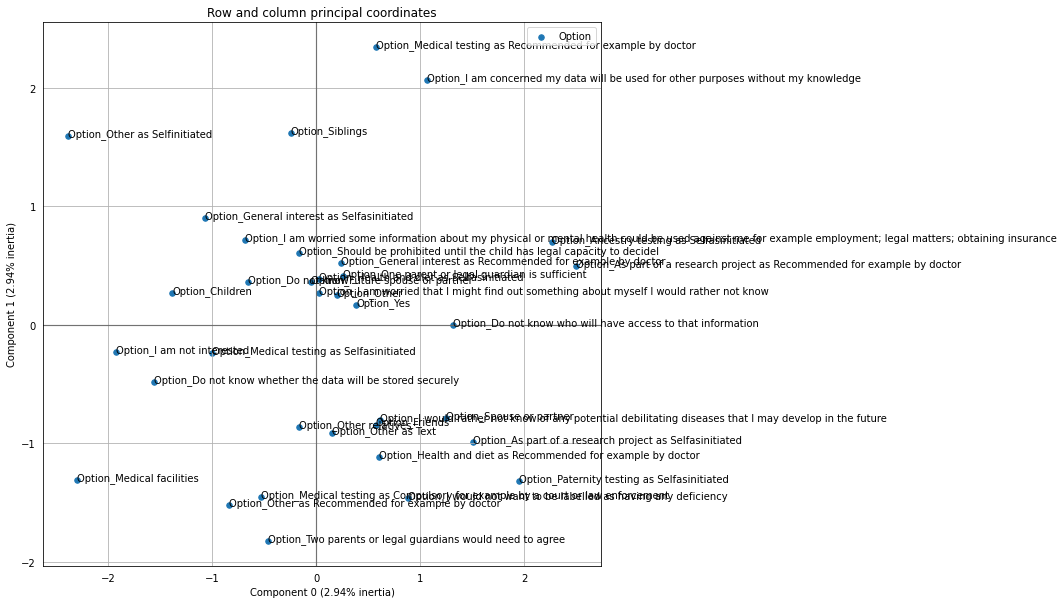

In [64]:
mca.plot_coordinates(ndlex.iloc[:,1],
                     row_points_alpha=.2,
                     figsize=(10, 10),
                     show_column_labels=True
                    );

## correlations - theil's U

In [65]:
from dython.nominal import associations


In [66]:

cdf = large_df.groupby(["Group", "Description", "Variable"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()


nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


cdf['rating'] = nx.iloc[:,2]


wo = []
for i in range(len(cdf['rating'])) : 
    wo.append(pd.Series(cdf.iloc[i, 4]).apply(ast.literal_eval).apply(lambda x: pd.Series(x)).stack().value_counts())

    
vc = pd.DataFrame(wo)



ndfx = pd.concat([cdf, vc], axis=1)
del ndfx['Option']
ndfx


hr = pd.read_csv("/home/mrinalmanu/Documents/iglas_le/reg_gen_data.tsv", sep='\t', low_memory=False)
hr

del hr["Description"]
del hr["Group"]
del hr["Composite"]

t_gr = pd.merge(ndfx, hr, on='Variable')
del t_gr["rating"]

del t_gr["Variable"]
del t_gr["Option"]

lex = t_gr.set_index(['Group','Description']).stack().reset_index()
# rename columns 2 and 3
lex["Option"] = lex['level_2']
lex["Count"] = lex[0]

del lex['level_2']
del lex[0]


x = lex.groupby(['Group','Description', 'Option'])['Count'].mean().round(2)
xf = x.groupby(level=[0, 1]).apply(lambda g: g / g.sum()).round(2).reset_index()



In [67]:
snx = xf

In [68]:
del snx['Group']

In [69]:
snx['Description'] = snx['Description'].replace('Genetic data of our first degree blood relatives can be used to identify us or to make predictions about our behaviour and traits. Therefore, we can be affected by our relatives’ decisions about the use of genetic data. Should there be a law regulating how a person protects aka stores, shares etc. their own genetic data?', 'Opinion - Genetic data')
snx['Description'] = snx['Description'].replace('In most instances, and assuming two parents will be involved in raising a child, who should decide on sequencing a child’s genome at birth?', 'Opinion - Child genome sequencing decision')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

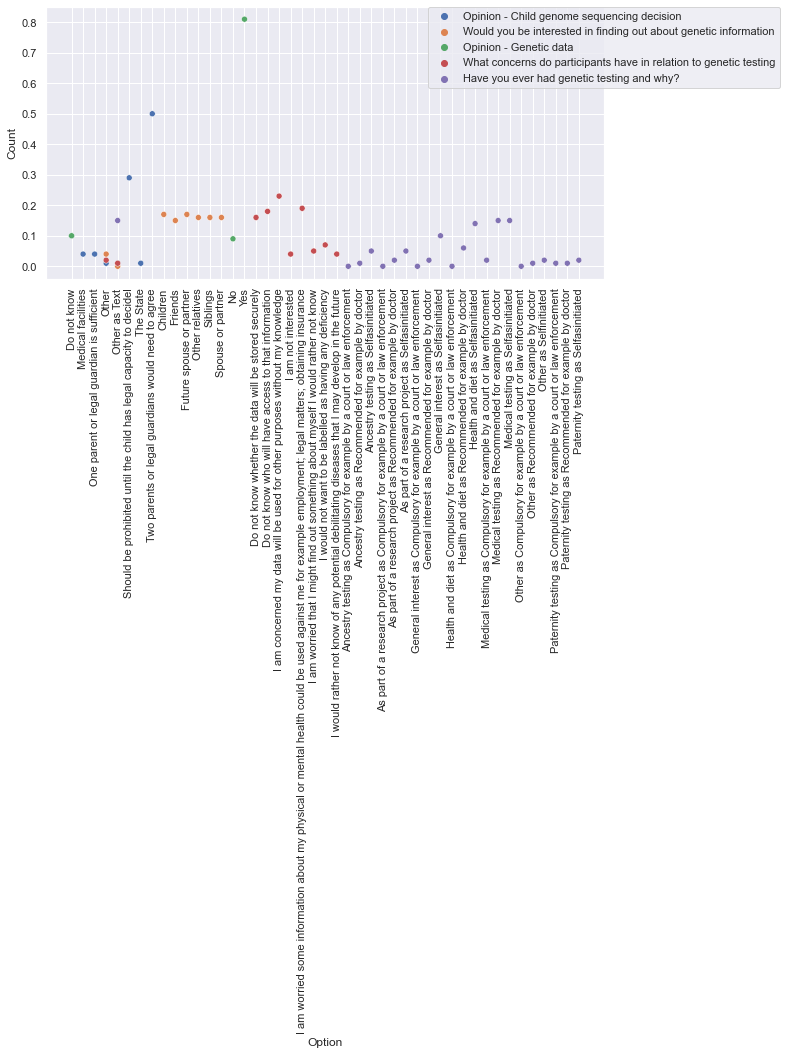

In [70]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10,5)})

g = sns.scatterplot(data=snx, x=snx.Option, y='Count', hue='Description')
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1, 1), loc='upper center', borderaxespad=0.)

plt.xticks(rotation=90)

In [71]:
grx = t_gr

del grx['Description']
del grx['Group']

In [72]:
ngrx = grx/len(grx)

In [73]:
ngrx # dropped proportions less than 1 %
ngrx.drop([col for col, val in ngrx.sum().iteritems() if val < 1], axis=1, inplace=True)


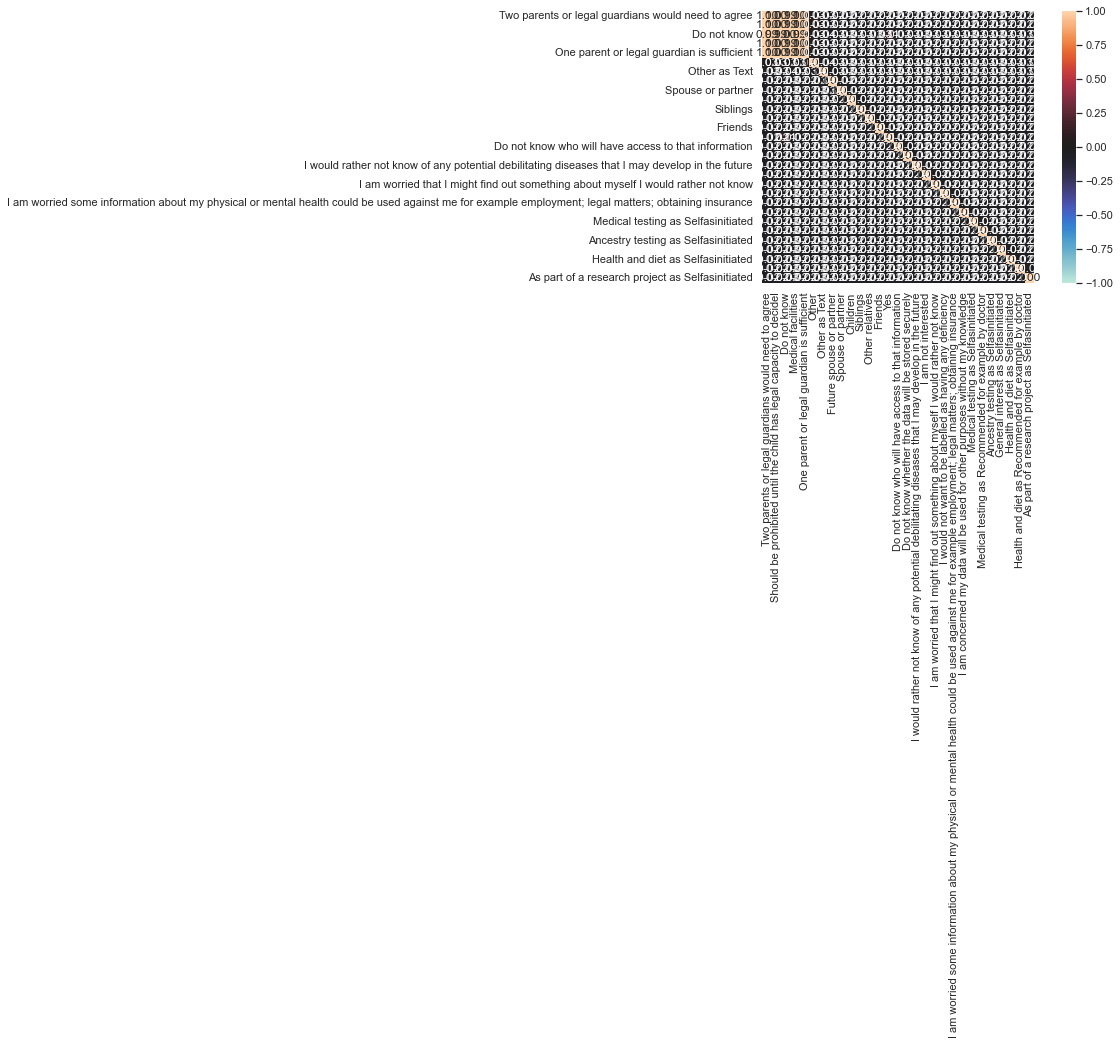

{'corr':                                                     Two parents or legal guardians would need to agree  \
 Two parents or legal guardians would need to agree                                           1.000000    
 Should be prohibited until the child has legal ...                                           1.000000    
 Do not know                                                                                  0.991359    
 Medical facilities                                                                           1.000000    
 One parent or legal guardian is sufficient                                                   1.000000    
 Other                                                                                        0.032449    
 Other as Text                                                                               -0.033873    
 Future spouse or partner                                                                    -0.023810    
 Spouse or partner           

In [74]:
associations(ngrx, nom_nom_assoc = 'theil' ,nan_strategy='replace')

## network analysis

In [75]:
large_df

,level_0,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
0,0,61344.0,0,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
1,1,61345.0,1,100,RU,1,Do not know,LE3.087,"In most instances, and assuming two parents wi...",Do not know,23,Yes
2,2,61347.0,3,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
3,3,61349.0,5,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
4,4,61350.0,6,100,ES-ES,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
14772,80213,NaN,1616,100,RU,5,нет,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
14773,80424,NaN,1827,85,RU,5,Не интересно.,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
14774,80458,NaN,1861,100,RU,6,Нет,LE3.108,Would you be interested in finding out about g...,Other as Text,24,No
14775,80490,NaN,1893,100,ES-ES,8,"En general, creo que se haría un mal uso de to...",LE3.108,Would you be interested in finding out about g...,Other as Text,24,No


### replacing "other", "other_as_Text" as empty strings

In [188]:
cdf = large_df
cdf['Option'] = cdf['Option'].str.replace('Other as Text', '')
cdf['Option'] = cdf['Option'].str.replace('Other', '')
cdf

,level_0,index,id,Progress,UserLanguage,Collection,value,Variable,Description,Option,Group,Composite
0,0,61344.0,0,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
1,1,61345.0,1,100,RU,1,Do not know,LE3.087,"In most instances, and assuming two parents wi...",Do not know,23,Yes
2,2,61347.0,3,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
3,3,61349.0,5,100,RU,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
4,4,61350.0,6,100,ES-ES,1,Two parents or legal guardians would need to a...,LE3.087,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...,23,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
14772,80213,NaN,1616,100,RU,5,нет,LE3.108,Would you be interested in finding out about g...,,24,No
14773,80424,NaN,1827,85,RU,5,Не интересно.,LE3.108,Would you be interested in finding out about g...,,24,No
14774,80458,NaN,1861,100,RU,6,Нет,LE3.108,Would you be interested in finding out about g...,,24,No
14775,80490,NaN,1893,100,ES-ES,8,"En general, creo que se haría un mal uso de to...",LE3.108,Would you be interested in finding out about g...,,24,No


In [189]:

cdf = cdf.groupby(["id", "Group", "Description"])["Option"].agg(lambda x: """','""".join(x[x != ''])).reset_index()


In [190]:
cdf

,id,Group,Description,Option
0,0,23,"In most instances, and assuming two parents wi...",Two parents or legal guardians would need to a...
1,0,24,Would you be interested in finding out about g...,"Future spouse or partner','Spouse or partner',..."
2,0,25,Genetic data of our first degree blood relativ...,Yes
3,0,27,What concerns do participants have in relation...,
4,0,29,Have you ever had genetic testing and why?,
...,...,...,...,...
5215,1911,24,Would you be interested in finding out about g...,"Future spouse or partner','Spouse or partner',..."
5216,1911,27,What concerns do participants have in relation...,Do not know whether the data will be stored se...
5217,1912,27,What concerns do participants have in relation...,I am not interested
5218,1915,27,What concerns do participants have in relation...,I am worried that I might find out something a...


In [191]:
nx = ("""'"""+cdf['Option'].astype(str)+"""'""").apply(lambda x: pd.Series(x)).stack().reset_index() # convert string to series


cdf['rating'] = nx.iloc[:,2]



In [192]:
del cdf['Option']

In [193]:
cdf

,id,Group,Description,rating
0,0,23,"In most instances, and assuming two parents wi...",'Two parents or legal guardians would need to ...
1,0,24,Would you be interested in finding out about g...,"'Future spouse or partner','Spouse or partner'..."
2,0,25,Genetic data of our first degree blood relativ...,'Yes'
3,0,27,What concerns do participants have in relation...,''
4,0,29,Have you ever had genetic testing and why?,''
...,...,...,...,...
5215,1911,24,Would you be interested in finding out about g...,"'Future spouse or partner','Spouse or partner'..."
5216,1911,27,What concerns do participants have in relation...,'Do not know whether the data will be stored s...
5217,1912,27,What concerns do participants have in relation...,'I am not interested'
5218,1915,27,What concerns do participants have in relation...,'I am worried that I might find out something ...


In [194]:
# network visualization

from itertools import combinations
import networkx as nx
import nxviz as nv


In [195]:
# return a list of ratings

split_rating = lambda rank : [[str(y.strip()) for y in x.split('''","''')] for x in rank]


In [196]:
selections = split_rating(cdf['rating'])

In [197]:
new_list = [item[0].split(",") for item in selections]

In [198]:
new_list

[["'Two parents or legal guardians would need to agree'"],
 ["'Future spouse or partner'",
  "'Spouse or partner'",
  "'Children'",
  "'Siblings'",
  "' relatives'",
  "'Friends'"],
 ["'Yes'"],
 ["''"],
 ["''"],
 ["'Do not know'"],
 ["'Future spouse or partner'",
  "'Spouse or partner'",
  "'Children'",
  "'Siblings'",
  "' relatives'",
  "'Friends'"],
 ["'Yes'"],
 ["'Do not know who will have access to that information'",
  "'Do not know whether the data will be stored securely'",
  "'I am worried that I might find out something about myself I would rather not know'"],
 ["''"],
 ["'Two parents or legal guardians would need to agree'"],
 ["'Future spouse or partner'",
  "'Spouse or partner'",
  "'Children'",
  "'Siblings'",
  "' relatives'",
  "'Friends'"],
 ["'Do not know who will have access to that information'",
  "'Do not know whether the data will be stored securely'",
  "'I am concerned my data will be used for other purposes without my knowledge'"],
 ["'Medical testing as Recom

In [199]:
# flatten list function

def flatten_list(_2d_list):
    flat_list = []
    # Iterate through the outer list
    for element in _2d_list:
        if type(element) is list:
            # If the element is of type list, iterate through the sublist
            for item in element:
                flat_list.append(item)
        else:
            flat_list.append(element)
    return flat_list

In [200]:
# Extract rating connections
rating_connections = list(
    map(lambda x: list(combinations(x[::-1], 2)), new_list)
)

In [201]:
flat_connections = flatten_list(rating_connections)


In [202]:
df_graph = pd.DataFrame.from_records(flat_connections, columns=["From", "To"])


In [203]:
df_graph = df_graph.groupby(["From", "To"]).size().reset_index()
df_graph.columns = ["From", "To", "Count"]
G = nx.from_pandas_edgelist(
    df_graph, source="From", target="To", edge_attr="Count"
)


In [204]:
#Let's opt for a spring layout
spring_pos = nx.spring_layout(G, seed=2) 

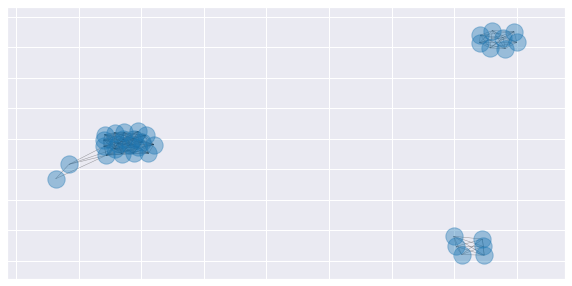

In [205]:
#draw the network
nx.draw_networkx_nodes(G, spring_pos, alpha=0.4)
nx.draw_networkx_edges(G, spring_pos,width = 0.5, alpha=0.4)


In [206]:
from pyvis.network import Network

In [207]:
net = Network(notebook=True)

In [208]:
net.from_nx(G)

In [209]:
net.show('example.html')

In [210]:
# dynamic node sizes

scale=1 # Scaling the size of the nodes by 10*degree
d = dict(G.degree)

#Updating dict
d.update((x, scale*y) for x, y in d.items())

#Setting up size attribute
nx.set_node_attributes(G,d,'size')

G2 = Network(height="1500px", width="75%",bgcolor="#222222",font_color="white",directed=False)
G2.from_nx(G)
G2.show("network_map.html")

EON